# Classifying Heat

### Available training data
- Part details
- Google trends popularity
- Web scraped popularity
- Flip sales
- Manufacturer sales?
- Current inventory

### Testing set
- Heat index

### Features/columns
- Part
- Relevant part details: Any details that are common for all parts. Can be narrowed down further.
- Web scraped popularity: Simple rank of a part in terms of popularity out of all parts.
- Google trends popularity: Use regression or simply compute the mean to determine the current popularity of a part on a scale of 0-100.
- Flip sales popularity: Similar method to google trends. Could base it off quantity, revenue, and/or profits.
- Manufacturer sales popularity: Have not looked into this data yet.

In [ ]:
import pandas as pd

allGooglePopDf = pd.read_excel('output\\all_google_trends_popularity.xlsx')
skyHighGooglePopDf = pd.read_excel('output\\sky_high_google_trends_popularity.xlsx')
cypressGooglePopDf = pd.read_excel('output\\cypress_google_trends_popularity.xlsx')
scrapedPopDf = pd.read_csv('output\\web_scraped_popularity2.csv')
scrapedDetailsDf = pd.read_csv('output\\web_scraped_details2.csv')
scrapedInfoDf = pd.read_csv('output\\web_scraped_parts_info_2.csv')

In [171]:
import pandas as pd

# finalDf = pd.DataFrame()
# finalDf['Part'] = ''

finalDf = pd.read_excel('data\\6_3 Sky High Q2 Analysis.xlsx', sheet_name='Bidding_summary')
finalDf2 = pd.read_excel("data\\Cypress Q2'20 Heat Index.xlsx", sheet_name='Sheet1')

finalDf = finalDf[['MPN', 'Heat']]
finalDf2 = finalDf2[['Ordering MPN', 'Heat']]

finalDf.columns = ['Part', 'Heat']
finalDf2.columns = ['Part', 'Heat']

# finalDf = finalDf.merge(finalDf2, how='outer', left_on='MPN', right_on='Ordering MPN')
finalDf = pd.concat([finalDf, finalDf2], axis=0, ignore_index=False, sort=False)

In [174]:
partsDf = pd.read_excel('data\\45292-parts.xlsx', sheet_name='Sheet1')
count = 0

for i, part in finalDf['Part'].iteritems():
    if part not in partsDf['Prcpart'].tolist():
        count += 1
        
print(count)

2295


In [162]:
print(finalDf.Heat.unique())

finalDf['Heat'] = finalDf['Heat'].str.lower()

for i, row in finalDf.iterrows():
    row[1] = row[1]
    if row[1] == 'cold/warm':
        finalDf.loc[i, 'Heat'] = 'cold'
    part = row[0]
    if part and (len(part) > 2) and ((part[:3].lower() == 'con') or (part[:3].lower() == 'stk')):
        part = part[3:]
        finalDf.loc[i, 'Part'] = part
    if part and (part[0] == '-'):
        part = part[1:]
        finalDf.loc[i, 'Part'] = part
    if part and (part[len(part)-1] == '-'):
        part = part[:len(part)-1]
        finalDf.loc[i, 'Part'] = part
    if '-+' in part:
        part = part[:part.index('-+')] + part[part.index('-+')+2:]
        finalDf.loc[i, 'Part'] = part

print(finalDf.Heat.unique())

['cold' 'warm' 'hot']
['cold' 'warm' 'hot']


In [175]:
partsDf = pd.read_excel('data\\45292-parts.xlsx', sheet_name='Sheet1')
count = 0

for i, row in partsDf.iterrows():
    part = row[0]
    if part and (len(part) > 2) and ((part[:3].lower() == 'con') or (part[:3].lower() == 'stk')):
        part = part[3:]
        partsDf.loc[i, 'Prcpart'] = part
    if part and (part[0] == '-'):
        part = part[1:]
        partsDf.loc[i, 'Prcpart'] = part
    if part and (part[len(part)-1] == '-'):
        part = part[:len(part)-1]
        partsDf.loc[i, 'Prcpart'] = part
    if '-+' in part:
        part = part[:part.index('-+')] + part[part.index('-+')+2:]
        partsDf.loc[i, 'Prcpart'] = part

for i, part in finalDf['Part'].iteritems():
    if part not in partsDf['Prcpart'].tolist():
        count += 1
        
print(count)

1722


In [163]:
finalDf

,Part,Heat
0,S34ML01G100TFA000,cold
1,S34ML01G100TFA003,cold
2,S34ML01G100TFI900,cold
3,S34ML01G100TFV000,cold
4,S34ML01G200BHI000,warm
...,...,...
2243,CY7C1461KV33-133AXC,cold
2244,S25FL256LDPNFI010,cold
2245,CY7C65113C-SXC,cold
2246,CY7B991-7JXC,cold


## Flip data

In [70]:
#Importing Necessary Libraries 
import pandas as pd
import numpy as np

### Sales

In [164]:
#Read in spreadsheet.
df = pd.read_excel('data\\June 2020\\Sales by Mfg 06-20.xlsx', sheet_name='Invoiced Lines')
df.head()
new_df = df.rename(columns={"Invoice Date": "Invoice_Date", "Prcpart": "Part", "Ext Resale": "Ext_Resale"})
new_df.head()
dataframe = new_df.groupby('Part').Ext_Resale.sum().reset_index()
new_dataframe = dataframe.sort_values(by='Ext_Resale',ascending =False)
print("Number of rows: ")
print(new_dataframe.shape[0])
new_dataframe.head()

# if the part starts with "CON" or "STK" remove it
# Also remove any characters that cause bad requests
for i, part in new_dataframe['Part'].iteritems():
    if part and (len(part) > 2) and ((part[:3].lower() == 'con') or (part[:3].lower() == 'stk')):
        part = part[3:]
        new_dataframe.loc[i, 'Part'] = part
    if part and (part[0] == '-'):
        part = part[1:]
        new_dataframe.loc[i, 'Part'] = part
    if part and (part[len(part)-1] == '-'):
        part = part[:len(part)-1]
        new_dataframe.loc[i, 'Part'] = part
    if '-+' in part:
        part = part[:part.index('-+')] + part[part.index('-+')+2:]
        new_dataframe.loc[i, 'Part'] = part

finalDf = finalDf.merge(new_dataframe, how='left', on='Part')
print(finalDf)

Number of rows: 
1317
                     Part  Heat  Ext_Resale
0       S34ML01G100TFA000  cold         NaN
1       S34ML01G100TFA003  cold         NaN
2       S34ML01G100TFI900  cold         NaN
3       S34ML01G100TFV000  cold         NaN
4       S34ML01G200BHI000  warm      6930.0
...                   ...   ...         ...
2290  CY7C1461KV33-133AXC  cold      2736.0
2291    S25FL256LDPNFI010  cold     15829.7
2292       CY7C65113C-SXC  cold      1998.5
2293         CY7B991-7JXC  cold      1080.0
2294    S29GL02GS12TFSR20  cold     21422.5

[2295 rows x 3 columns]


### Profit margin

In [165]:
#Read in spreadsheet.
df = pd.read_excel('data\\June 2020\\Sales by Mfg 06-20.xlsx', sheet_name='Invoiced Lines')
df.head()
new_df = df.rename(columns={"Invoice Date": "Invoice_Date", "Prcpart": "Part", "Ext Resale": "Ext_Resale", "Ext Cost": "Ext_Cost"})
new_df = new_df.assign(Profit_Margin = new_df['Ext_Resale'] - new_df['Ext_Cost'])
new_df.head()
dataframe = new_df.groupby('Part').Profit_Margin.sum().reset_index()
new_dataframe = dataframe.sort_values(by='Profit_Margin',ascending =False)
new_dataframe.head()

# if the part starts with "CON" or "STK" remove it
# Also remove any characters that cause bad requests
for i, part in new_dataframe['Part'].iteritems():
    if part and (len(part) > 2) and ((part[:3].lower() == 'con') or (part[:3].lower() == 'stk')):
        part = part[3:]
        new_dataframe.loc[i, 'Part'] = part
    if part and (part[0] == '-'):
        part = part[1:]
        new_dataframe.loc[i, 'Part'] = part
    if part and (part[len(part)-1] == '-'):
        part = part[:len(part)-1]
        new_dataframe.loc[i, 'Part'] = part
    if '-+' in part:
        part = part[:part.index('-+')] + part[part.index('-+')+2:]
        new_dataframe.loc[i, 'Part'] = part

finalDf = finalDf.merge(new_dataframe, how='left', on='Part')
print(finalDf)

                     Part  Heat  Ext_Resale  Profit_Margin
0       S34ML01G100TFA000  cold         NaN            NaN
1       S34ML01G100TFA003  cold         NaN            NaN
2       S34ML01G100TFI900  cold         NaN            NaN
3       S34ML01G100TFV000  cold         NaN            NaN
4       S34ML01G200BHI000  warm      6930.0      6283.2000
...                   ...   ...         ...            ...
2290  CY7C1461KV33-133AXC  cold      2736.0       576.0000
2291    S25FL256LDPNFI010  cold     15829.7      6975.8000
2292       CY7C65113C-SXC  cold      1998.5       649.5125
2293         CY7B991-7JXC  cold      1080.0       400.0000
2294    S29GL02GS12TFSR20  cold     21422.5      4263.6000

[2295 rows x 4 columns]


### Cost

In [166]:
#Read in spreadsheet.
df = pd.read_excel('data\\June 2020\\Sales by Mfg 06-20.xlsx', sheet_name='Invoiced Lines')
df.head()
new_df = df.rename(columns={"Invoice Date": "Invoice_Date", "Prcpart": "Part", "Ext Resale": "Ext_Resale", "Ext Cost": "Ext_Cost"})
new_df.head()
dataframe = new_df.groupby('Part').Ext_Cost.sum().reset_index()
new_dataframe = dataframe.sort_values(by='Ext_Cost',ascending =False)
new_dataframe.head()

# if the part starts with "CON" or "STK" remove it
# Also remove any characters that cause bad requests
for i, part in new_dataframe['Part'].iteritems():
    if part and (len(part) > 2) and ((part[:3].lower() == 'con') or (part[:3].lower() == 'stk')):
        part = part[3:]
        new_dataframe.loc[i, 'Part'] = part
    if part and (part[0] == '-'):
        part = part[1:]
        new_dataframe.loc[i, 'Part'] = part
    if part and (part[len(part)-1] == '-'):
        part = part[:len(part)-1]
        new_dataframe.loc[i, 'Part'] = part
    if '-+' in part:
        part = part[:part.index('-+')] + part[part.index('-+')+2:]
        new_dataframe.loc[i, 'Part'] = part

finalDf = finalDf.merge(new_dataframe, how='left', on='Part')
print(finalDf)

                     Part  Heat  Ext_Resale  Profit_Margin    Ext_Cost
0       S34ML01G100TFA000  cold         NaN            NaN         NaN
1       S34ML01G100TFA003  cold         NaN            NaN         NaN
2       S34ML01G100TFI900  cold         NaN            NaN         NaN
3       S34ML01G100TFV000  cold         NaN            NaN         NaN
4       S34ML01G200BHI000  warm      6930.0      6283.2000    646.8000
...                   ...   ...         ...            ...         ...
2290  CY7C1461KV33-133AXC  cold      2736.0       576.0000   2160.0000
2291    S25FL256LDPNFI010  cold     15829.7      6975.8000   8853.9000
2292       CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875
2293         CY7B991-7JXC  cold      1080.0       400.0000    680.0000
2294    S29GL02GS12TFSR20  cold     21422.5      4263.6000  17158.9000

[2295 rows x 5 columns]


## Web scraped part details and popularity

#### To Do:
- Get Manufacturer from the dropdown
- Get part number and prc from the search

In [167]:
import pandas as pd

scrapedInfoDf = pd.read_csv('output\\web_scraped_parts_info_2.csv')

df = scrapedInfoDf[['Manufacturer Part Number:', 'Global Popularity', 'Global Popularity total']]

finalDf = finalDf.merge(df, how='left', left_on='Part', right_on='Manufacturer Part Number:')
print(finalDf)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,12,13,14,17,19,20,21,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,67,68,69,70,71,72,73,74,75,76,82,83,85,86,88,89,90,92,94,96,97,98,101,104,105,106,107,108,109,110,112,116,117,118,131,132,133,134,135,136,137,138,139,141,142,143,144,145,150,151,152,153,158,159,160,161,162,163,164,165,166,167,168,169,171,172,173,180,181,182,183,185,186,187,192,193,194,195,196,197,198,199,200,201,202,203,208,209,210,211,212,213,214,215,216,217,218,220,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,277,278,279,280,281,282,283,284,285,286,291,292,293,294,297,298,299,300,301,302,303,304,305,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,328,332,333,338,339,341,344,345,346,347,350,351,354,357,358,359,360,361,362,363,364,365,366,369,370,37

                   Part  Heat  Ext_Resale  Profit_Margin    Ext_Cost  \
0     S34ML01G100TFA000  cold         NaN            NaN         NaN   
1     S34ML01G100TFA003  cold         NaN            NaN         NaN   
2     S34ML01G100TFI900  cold         NaN            NaN         NaN   
3     S34ML01G100TFV000  cold         NaN            NaN         NaN   
4     S34ML01G200BHI000  warm      6930.0      6283.2000    646.8000   
...                 ...   ...         ...            ...         ...   
2534  S25FL256LDPNFI010  cold     15829.7      6975.8000   8853.9000   
2535     CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875   
2536     CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875   
2537       CY7B991-7JXC  cold      1080.0       400.0000    680.0000   
2538  S29GL02GS12TFSR20  cold     21422.5      4263.6000  17158.9000   

     Manufacturer Part Number:  Global Popularity  Global Popularity total  
0                          NaN                NaN         

In [ ]:
import pandas as pd
import numpy as np

scrapedPopDf = pd.read_csv('output\\web_scraped_popularity2.csv')
scrapedDetailsDf = pd.read_csv('output\\web_scraped_details2.csv')

total = scrapedPopDf['Global Popularity total'].unique()
# 3845472

len(scrapedDetailsDf['Manufacturer Part Number:'].unique())
# 13887

len(scrapedDetailsDf)
# 20511

scrapedDetailsDf['Manufacturer Part Number:'].isna().sum()


In [168]:
import pandas as pd

scrapedDetailsDf = pd.read_csv('output\\web_scraped_details2.csv')

nullCols = scrapedDetailsDf.isna().sum().sort_values()

nullCols.head(10)
# Unnamed: 0                       0
# Manufacturer Part Number:        0
# Part Life Cycle Code:            0
# Manufacturer:                    1
# Reach Compliance Code:          23
# Ihs Manufacturer:               44
# Risk Rank:                     187
# Rohs Code:                    5417
# Operating Temperature-Max:    5765
# Package Description:          6225

usefulDetailsDf = scrapedDetailsDf[['Manufacturer Part Number:', 'Part Life Cycle Code:', 'Manufacturer:', 'Reach Compliance Code:', 'Risk Rank:']]

finalDf = finalDf.merge(usefulDetailsDf, how='left', left_on='Manufacturer Part Number:', right_on='Manufacturer Part Number:')
print(finalDf)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,11,12,13,16,18,19,20,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,60,61,62,63,64,65,66,67,68,69,71,72,74,75,77,78,79,81,83,85,86,87,90,93,94,95,96,97,98,99,101,105,106,107,108,109,110,111,112,113,114,115,116,118,119,120,121,122,123,124,125,126,128,129,130,131,132,133,134,135,136,137,138,140,141,142,143,144,145,146,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,176,177,178,179,180,181,182,183,184,185,186,187,188,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,268,269,270,271,273,274,275,276,277,278,279,281,282,283,284,285,286,287,288,289,29

                   Part  Heat  Ext_Resale  Profit_Margin    Ext_Cost  \
0     S34ML01G100TFA000  cold         NaN            NaN         NaN   
1     S34ML01G100TFA003  cold         NaN            NaN         NaN   
2     S34ML01G100TFI900  cold         NaN            NaN         NaN   
3     S34ML01G100TFV000  cold         NaN            NaN         NaN   
4     S34ML01G200BHI000  warm      6930.0      6283.2000    646.8000   
...                 ...   ...         ...            ...         ...   
2751     CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875   
2752     CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875   
2753     CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875   
2754       CY7B991-7JXC  cold      1080.0       400.0000    680.0000   
2755  S29GL02GS12TFSR20  cold     21422.5      4263.6000  17158.9000   

     Manufacturer Part Number:  Global Popularity  Global Popularity total  \
0                          NaN                NaN        

## Calculating google trends popularity

In [169]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge

df = pd.read_csv('output\\all_google_trends_popularity.csv').set_index('date')

# Add dataframes for merging datasets that were incomplete
df2 = pd.read_csv('output\\all_google_trends_popularity2.csv').set_index('date')
df = pd.concat([df, df2], axis=1, ignore_index=False, sort=False)

# Drop duplicated columns
df = df.loc[:,~df.columns.duplicated()]

# Using mean
# count = 0
# parts = []
# for part in df:
#     tot = df[part].mean(axis=0, skipna=True)
# #     print(str(count) + ') ' + '[' + part + '] ' + str(tot))
#     if int(tot) > 0:
#         parts.append([part, tot])
#     count += 1
# popDf = pd.DataFrame(parts)
# popDf.columns = ['Part', 'Popularity']
# display(popDf)


# Alternative to mean using Regression
count = 0
parts = []
df['X'] = [i for i in range(len(df))] # convert to ordinal instead of using date
for part in df:
    reg = BayesianRidge().fit(df[['X']], df[part])
    pred = reg.predict([[len(df)+1]])
    if pred[0] > 0:
        parts.append([part, pred[0]])
    count += 1
popDf = pd.DataFrame(parts)
popDf.columns = ['Part', 'Google Popularity']
display(popDf)

finalDf = finalDf.merge(popDf, how='left', on='Part')
print(finalDf)

,Part,Google Popularity
0,W25Q32BVSSIG,8.105800
1,1.5KE33CA,10.642351
2,1N4001G,3.580574
3,2938963,9.551528
4,74HC04D,22.224234
...,...,...
447,W83627EHG,7.012332
448,WD200BB,3.522171
449,Y926,6.928649
450,ZVN4206A,8.010281


                   Part  Heat  Ext_Resale  Profit_Margin    Ext_Cost  \
0     S34ML01G100TFA000  cold         NaN            NaN         NaN   
1     S34ML01G100TFA003  cold         NaN            NaN         NaN   
2     S34ML01G100TFI900  cold         NaN            NaN         NaN   
3     S34ML01G100TFV000  cold         NaN            NaN         NaN   
4     S34ML01G200BHI000  warm      6930.0      6283.2000    646.8000   
...                 ...   ...         ...            ...         ...   
2751     CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875   
2752     CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875   
2753     CY7C65113C-SXC  cold      1998.5       649.5125   1348.9875   
2754       CY7B991-7JXC  cold      1080.0       400.0000    680.0000   
2755  S29GL02GS12TFSR20  cold     21422.5      4263.6000  17158.9000   

     Manufacturer Part Number:  Global Popularity  Global Popularity total  \
0                          NaN                NaN        

## Save the final dataset

In [170]:
finalDf.to_excel('heat_classifier_train.xlsx')

## Testing some regression methods

[22.22423409]


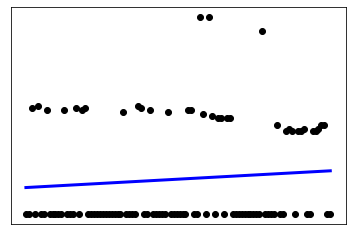

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Perceptron, LogisticRegression, BayesianRidge
import plotly.express as px
import datetime as dt

df = pd.read_csv('output\\all_google_trends_popularity.csv')
part = '74HC04D'
# df = pd.read_csv('output\\sky_high_google_trends_popularity.csv')
# part = 'S34ML02G100TFI000'

# print(df.columns)

df['X'] = [i for i in range(len(df))]
# df['X'] = pd.to_datetime(df['date'], format='%Y-%m-%d').map(dt.datetime.toordinal)

reg = BayesianRidge().fit(df[['X']], df[part])

pred = reg.predict([[len(df)+1]])
print(pred)

pred = reg.predict(df[['X']])

# Plot outputs
plt.scatter(df['X'], df[part],  color='black')
plt.plot(df['X'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Examples for regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('sky_high_google_trends_popularity.csv')

y = df.iloc[:, 5]
X = [i for i in range(len(y))]
# test = [[len(X), len(X)+1, len(X)+2]]

X = X.reshape(-1, 1)

print(X)

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X, y,  color='black')
# plt.plot(X, y_pred[0], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()